In [1]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
from sklearn.model_selection import train_test_split
import numpy

import numpy as np #Linear Algebra
import pandas as pd #Data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score

import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import matplotlib

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
 
import string
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

from textblob import TextBlob

#Input data files are available in the "../input/" directory.
#For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#To print mulitple statements in single command 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
df_web = pd.read_csv('C:\\Reva\\BA06\\2nd Year\\capstone_project\\credit card recommadation\\dataset\\reviews_credit_card_data.csv')
df_web.info()
df_web.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3074 entries, 0 to 3073
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   bank_name        3074 non-null   object
 1   bank_name_short  3074 non-null   object
 2   card_category    3074 non-null   object
 3   reviews          3074 non-null   object
dtypes: object(4)
memory usage: 96.2+ KB


(3074, 4)

In [4]:
df_tweet = pd.read_csv('C:\\Reva\\BA06\\2nd Year\\capstone_project\\credit card recommadation\\dataset\\twitterdata\\twitterfiles\\twitterfiles.csv')
df_tweet.info()
df_tweet.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196 entries, 0 to 3195
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ttext          3195 non-null   object 
 1   date           3195 non-null   object 
 2   isretweet      3195 non-null   object 
 3   retweetcount   3195 non-null   float64
 4   favoritecount  3195 non-null   float64
 5   score          3195 non-null   float64
 6   product        3195 non-null   object 
 7   region         3195 non-null   object 
 8   country        3195 non-null   object 
 9   duplicate      3195 non-null   object 
dtypes: float64(3), object(7)
memory usage: 249.8+ KB


(3196, 10)

In [5]:
df_tweet.head()

,ttext,date,isretweet,retweetcount,favoritecount,score,product,region,country,duplicate
0,OnePlus 9RT in stock,19-01-2022 02:04,False,0.0,0.0,0.0,SBI,Delhi,India,False
1,@AxisBankSupport i haven't applied for Flipkar...,19-01-2022 02:44,False,0.0,0.0,0.0,Axis,Delhi,India,False
2,@HDFC_Bank My loan application and credit card...,19-01-2022 03:34,False,0.0,0.0,0.0,hdfc,Delhi,India,False
3,"Hey @AxisBank , i didn't received my credit ca...",19-01-2022 03:53,False,0.0,1.0,-1.0,Axis,Delhi,India,False
4,@TechnoFino \r\nBro I find a term in my hdfc m...,19-01-2022 04:03,False,0.0,0.0,0.0,hdfc,Delhi,India,False


In [6]:
frames = [df_web['reviews'], df_tweet['ttext']]
frame = pd.concat(frames, ignore_index=True)
df = frame.to_frame()
df = df.rename(columns={0:"comment"})

In [7]:
#type(data)
df

,comment
0,"On my first stay with the Trident Group, I was..."
1,From shopping at the supermarkets to watching ...
2,Have been using this card for over 2 years now...
3,This card is indeed the one that offers the mo...
4,The Valueback deals on fuels are the perfect b...
...,...
6265,@SBICard_Connect I have to surrender my sbi cr...
6266,@SBICard_Connect 3. SBI Credit Card PULSE\r\n\...
6267,@SBICard_Connect 3. SBI Credit Card PULSE \r\n...
6268,@mehulmpt I use SBI credit card for all intern...


In [8]:
df.head()
df.info()

,comment
0,"On my first stay with the Trident Group, I was..."
1,From shopping at the supermarkets to watching ...
2,Have been using this card for over 2 years now...
3,This card is indeed the one that offers the mo...
4,The Valueback deals on fuels are the perfect b...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6270 entries, 0 to 6269
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  6269 non-null   object
dtypes: object(1)
memory usage: 49.1+ KB


In [9]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from textblob import TextBlob

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
# Spell correct using text blob for the first 1000 records
from textblob import TextBlob
dfs = df['comment'][:5].apply(lambda x: str(TextBlob(x).correct()))

In [11]:
dfs

0    In my first stay with the Evident Group, I was...
1    From shopping at the supermarket to watching m...
2    Have been using this card for over 2 years now...
3    His card is indeed the one that offers the mos...
4    The Valueback deals on feels are the perfect b...
Name: comment, dtype: object

In [12]:
corpus = [] # form an empty list called corpus
ps = PorterStemmer() # for stemming the words to original form, for example - "running to run"
stop_words = set(stopwords.words('english')) # remove words such as will, I, and, at etc.
for i in range(0, 5144): # iterate through the list of all 5144 comments
  # remove handles (@), numbers, urls, emojis and any other special characters to have only text
  data_clean = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]", '',str(df.comment[i]))
  # convert all words to lower case
  data_clean = data_clean.lower()
  # split sentences into words
  data_clean = data_clean.split()
  # remove English stop words
  data_clean = [x for x in data_clean if not x in stop_words]
  # stem words to the base form
  data_clean = [ps.stem(x) for x in data_clean]
  # join words to form the original sentences
  data_clean = " ".join(data_clean)
  # append to the list to get all Comments in one place
  corpus.append(data_clean)
#print(corpus)

In [13]:
dflex = pd.read_excel('C:\\Reva\\BA06\\2nd Year\\capstone_project\\credit card recommadation\\dataset\\export_User_Comments_Polarity_Category.xlsx')
dflex = dflex[dflex['Polarity_type'] != 'Neutral']
dflex.info()
dflex.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 0 to 5140
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Polarity       2316 non-null   float64
 1   UserComments   2316 non-null   object 
 2   Polarity_type  2316 non-null   object 
dtypes: float64(1), object(2)
memory usage: 72.4+ KB


(2316, 3)

# POS Tagging

In [14]:
import os
import numpy as np

import pandas as pd
from tqdm import tqdm
tqdm.pandas()

from nltk import word_tokenize, pos_tag
from collections import Counter

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [15]:
from tqdm import tqdm, tqdm_notebook
tqdm_notebook().pandas()
pos_tags = dflex['Polarity_type'].progress_apply(lambda x: pos_tag(word_tokenize(str(x))))
targets = dflex['Polarity_type']

0it [00:00, ?it/s]

  0%|          | 0/2316 [00:00<?, ?it/s]

In [16]:
print(pos_tags[100])

[('Negative', 'JJ')]


In [17]:
tags = []
for i, tag in enumerate(pos_tags):
    pos_tags[i] = list(map(list, tag))
    tags.append(np.array(pos_tags[i])[:,0])
flat_tags = np.concatenate([tag for tag in tags])

In [18]:
counts = [dict(Counter(tag)) for tag in tags]

In [19]:
DATA_LEN = 1804874
SAMPLE_SIZE = 9546
all_tags = set(flat_tags)
df = pd.DataFrame(np.zeros((SAMPLE_SIZE, 1)))
df.columns = ['comment']
df.count_dict = counts
df.target = targets

# Bag Of Words

In [20]:
bagofwords=[]
for i in range (0,2316):
    words = corpus[i].split()
    bagofwords.append(words)

In [21]:
bagofwords[2315]

['hdfc',
 'credit',
 'card',
 'avail',
 'onlin',
 'use',
 'card',
 'past',
 'year',
 'free',
 'card',
 'money',
 'back',
 'card',
 'shop',
 'get',
 'discount',
 'pretti',
 'good',
 'movi',
 'ticket',
 'offer',
 'custom',
 'servic',
 'also',
 'good',
 'get',
 'proper',
 'respons',
 'need',
 'assist',
 'everyth',
 'good',
 'far',
 'face',
 'difficulti']

In [22]:
import itertools
import collections
all_words=list(itertools.chain(*bagofwords))
print(all_words[0:9546])
print()
print('Most commonly occuring words and frequency\n')
words_freq=collections.Counter(all_words)
words_freq.most_common(20)

['first', 'stay', 'trident', 'group', 'reward', 'bonu', 'point', 'shop', 'supermarket', 'watch', 'movi', 'spend', 'sbi', 'card', 'reward', 'use', 'card', 'year', 'benefit', 'reward', 'good', 'card', 'inde', 'one', 'offer', 'reward', 'fuel', 'save', 'benefit', 'card', 'holder', 'valueback', 'deal', 'fuel', 'perfect', 'benefit', 'card', 'util', 'reward', 'accru', 'sbi', 'card', 'util', 'bill', 'payment', 'groceri', 'shop', 'reward', 'everi', 'inr', 'spent', 'get', 'reward', 'point', 'made', 'use', 'reward', 'point', 'air', 'mile', 'shop', 'citi', 'bank', 'partner', 'tini', 'reward', 'redempt', 'fee', 'reward', 'good', 'got', 'reward', 'worth', 'sbi', 'exceed', 'spend', 'lac', 'like', 'amaz', 'reward', 'card', 'sbi', 'credit', 'card', 'get', 'membership', 'reward', 'point', 'everi', 'inr', 'spend', 'sinc', 'year', 'use', 'citi', 'bank', 'reward', 'credit', 'card', 'life', 'time', 'free', 'card', 'given', 'credit', 'limit', 'rs', 'use', 'card', 'shop', 'purpos', 'get', 'credit', 'card', 's

[('card', 2332),
 ('reward', 1827),
 ('credit', 788),
 ('point', 783),
 ('get', 714),
 ('use', 681),
 ('sbi', 610),
 ('shop', 568),
 ('fuel', 442),
 ('good', 370),
 ('limit', 347),
 ('inr', 344),
 ('offer', 331),
 ('got', 329),
 ('benefit', 323),
 ('spend', 306),
 ('bank', 268),
 ('year', 235),
 ('save', 223),
 ('cashback', 213)]

# Word Frequency

In [23]:
freq_word_df = pd.DataFrame(words_freq.most_common(20),columns=['words','Freq'])
freq_word_df.head()

,words,Freq
0,card,2332
1,reward,1827
2,credit,788
3,point,783
4,get,714


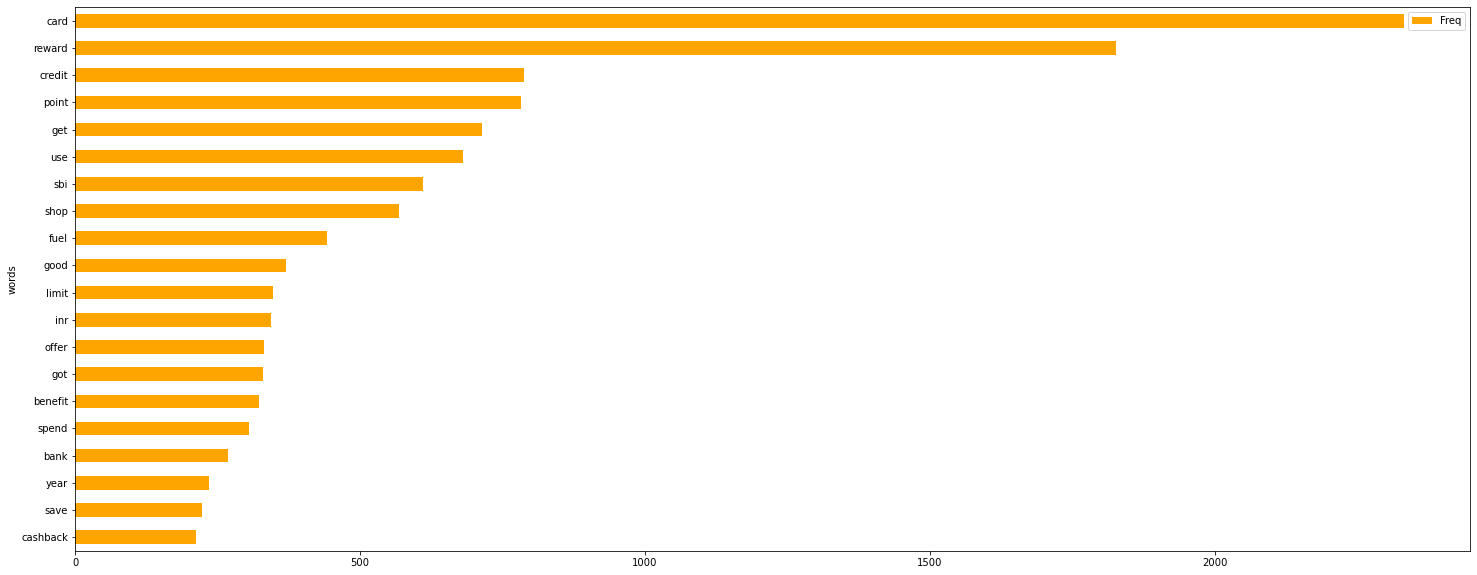

In [24]:
fig,ax=plt.subplots(figsize=(25,10))
freq_word_df.sort_values(by='Freq').plot.barh(x='words',y='Freq',ax=ax,color='orange')
plt.show();

# Word Frequency

In [25]:
# from wordcloud import WordCloud,STOPWORDS
# import matplotlib.pyplot as plt
# word_string=' '.join(freq_word_df.words)
# wordcloud=WordCloud(stopwords=STOPWORDS,
#                        background_color='black',
#                      max_words=20
#                       ).generate(word_string)

In [26]:
# plt.figure(figsize=(15,10))
# plt.clf()
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()

# Polarity by TextBlob

In [27]:
sentiment_text = [TextBlob(Comments) for Comments in corpus]
print(sentiment_text[10].polarity)
print(sentiment_text[10])

0.0
like amaz reward card sbi


In [28]:
sentiments = [[Comments.sentiment.polarity, str(Comments)] for Comments in sentiment_text]
sentiment_df = pd.DataFrame(sentiments, columns=["Polarity","UserComments"])
sentiment_df.sort_values(by='Polarity',ascending=False) 

,Polarity,UserComments
870,1.0,perfect lifestyl travel card given multitud be...
834,1.0,redeem reward point bpcl voucher sbi best
1559,1.0,happi sbi card perfect got discount onlin shop
276,1.0,balanc transfer flexi pay scheme reward priori...
1785,1.0,perfect card humong varieti shop benefit
...,...,...
4628,-1.0,worst credit card ever bank chase give stateme...
3357,-1.0,worst servic flipkart axi credit
4062,-1.0,icici bank ki credit card ki custom care ki se...
4027,-1.0,hdfc worst bank ever dont option updat address...


array([<AxesSubplot:title={'center':'Polarity'}>], dtype=object)

Text(0.5, 1.0, 'Sentiments Distribution on Credit Cards Data')

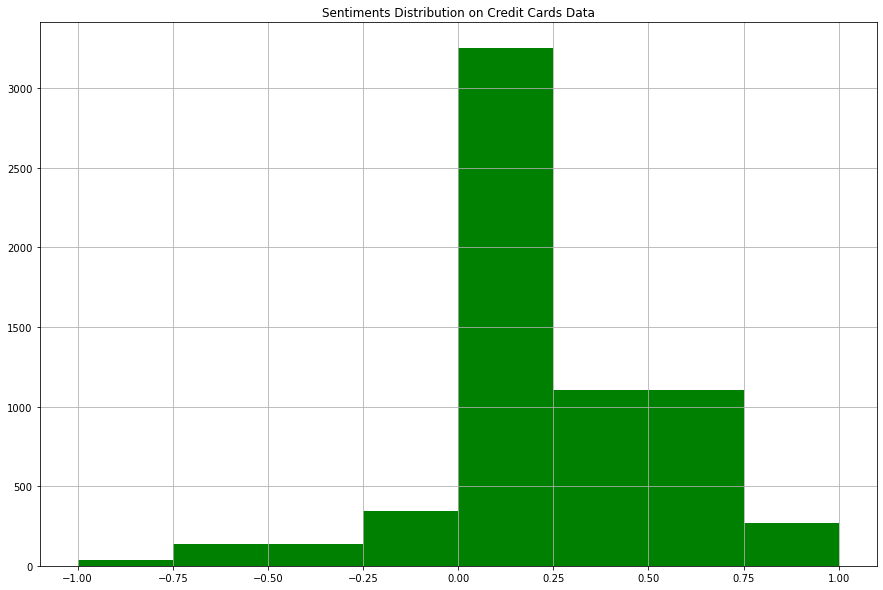

In [29]:
fig, ax = plt.subplots(figsize=(15,10))

#Plot histogram of the polarity values
sentiment_df.hist(bins=[-1.0, -0.75, -0.25, 0, 0.25, 0.75, 1.0], ax=ax, color="green")
plt.title("Sentiments Distribution on Credit Cards Data")
plt.show()

In [30]:
sentiment_df.groupby('Polarity').size()

Polarity
-1.000000     32
-0.800000      7
-0.750000      1
-0.714286      1
-0.700000     19
            ... 
 0.800000     51
 0.833333      1
 0.850000     17
 0.900000      9
 1.000000    171
Length: 300, dtype: int64

In [31]:
bins=(-1.0,0.0,1.0)
names=['Negative','Positive']
sentiment_df['Category']=pd.cut(sentiment_df['Polarity'],bins,labels=names)

In [32]:
sentiment_df.groupby('Category').size()

Category
Negative    3316
Positive    1796
dtype: int64

In [33]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Polarity      5144 non-null   float64 
 1   UserComments  5144 non-null   object  
 2   Category      5112 non-null   category
dtypes: category(1), float64(1), object(1)
memory usage: 85.6+ KB


In [34]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Polarity      5144 non-null   float64 
 1   UserComments  5144 non-null   object  
 2   Category      5112 non-null   category
dtypes: category(1), float64(1), object(1)
memory usage: 85.6+ KB


In [35]:
sentiment_df

,Polarity,UserComments,Category
0,0.250000,first stay trident group reward bonu point,Positive
1,0.000000,shop supermarket watch movi spend sbi card reward,Negative
2,0.700000,use card year benefit reward good,Positive
3,0.000000,card inde one offer reward fuel save benefit c...,Negative
4,1.000000,valueback deal fuel perfect benefit card,Positive
...,...,...,...
5139,0.000000,nation payment corpor india npci npci launch y...,Negative
5140,0.357143,pleas make special sale laptop also hdfc sbi c...,Positive
5141,0.000000,care receiv credit cardther credit limit inste...,Negative
5142,0.000000,support hi cred teamth amount deduct twice pay...,Negative


In [36]:
sentiment_df.columns

Index(['Polarity', 'UserComments', 'Category'], dtype='object')

In [37]:
dfp = pd.DataFrame(data=sentiment_df,
                    columns=['Polarity', 'UserComments', 'Category'])
dfp

,Polarity,UserComments,Category
0,0.250000,first stay trident group reward bonu point,Positive
1,0.000000,shop supermarket watch movi spend sbi card reward,Negative
2,0.700000,use card year benefit reward good,Positive
3,0.000000,card inde one offer reward fuel save benefit c...,Negative
4,1.000000,valueback deal fuel perfect benefit card,Positive
...,...,...,...
5139,0.000000,nation payment corpor india npci npci launch y...,Negative
5140,0.357143,pleas make special sale laptop also hdfc sbi c...,Positive
5141,0.000000,care receiv credit cardther credit limit inste...,Negative
5142,0.000000,support hi cred teamth amount deduct twice pay...,Negative


In [38]:
pandas.isnull(dfp)

,Polarity,UserComments,Category
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
5139,False,False,False
5140,False,False,False
5141,False,False,False
5142,False,False,False


In [39]:
# importing pandas package
import pandas as pd

# making data frame from excel file
#dataN = pd.read_excel("export_User_Comments_Polarity_Category.xlsx")

# creating bool series True for NaN values
#dataN_series = pd.isnull(dataN["Polarity_type"])
dataN_series = pd.isnull(dfp["Category"])

# filtering data
# displayind data only with team = NaN
#dataN[dataN_series]
dfp[dataN_series]

,Polarity,UserComments,Category
3116,-1.0,care bank worst credit card depart ask interes...,NaN
3145,-1.0,pleas dont take axi credit card worst servic f...,NaN
3146,-1.0,axi credit card worst peopl call centr call em...,NaN
3357,-1.0,worst servic flipkart axi credit,NaN
3366,-1.0,worst servic axi bank dear plz dont take credi...,NaN
3408,-1.0,connect worst credit card compani india credit...,NaN
3415,-1.0,connect worst servic sbi credit card depart do...,NaN
3444,-1.0,arvind credit card sbi close worst custom serv...,NaN
3625,-1.0,kindli suggest cancel axi bank credit card set...,NaN
3674,-1.0,care worst bank without permiss block icici cr...,NaN


In [40]:
# importing pandas module 
import pandas as pd 

# making data frame from csv file 
#dataN2 = pd.read_excel("export_User_Comments_Polarity_Category.xlsx")

# replacing na values in college with No college 
#dataN2["Polarity_type"].fillna("Negative", inplace = True) 
dfp["Category"].fillna("Negative", inplace = True)

dfp

,Polarity,UserComments,Category
0,0.250000,first stay trident group reward bonu point,Positive
1,0.000000,shop supermarket watch movi spend sbi card reward,Negative
2,0.700000,use card year benefit reward good,Positive
3,0.000000,card inde one offer reward fuel save benefit c...,Negative
4,1.000000,valueback deal fuel perfect benefit card,Positive
...,...,...,...
5139,0.000000,nation payment corpor india npci npci launch y...,Negative
5140,0.357143,pleas make special sale laptop also hdfc sbi c...,Positive
5141,0.000000,care receiv credit cardther credit limit inste...,Negative
5142,0.000000,support hi cred teamth amount deduct twice pay...,Negative


In [41]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Polarity      5144 non-null   float64 
 1   UserComments  5144 non-null   object  
 2   Category      5144 non-null   category
dtypes: category(1), float64(1), object(1)
memory usage: 85.6+ KB


In [42]:
#Export to Excel
from pandas import ExcelWriter
writer = ExcelWriter('C:\\Reva\\BA06\\2nd Year\\capstone_project\\credit card recommadation\\dataset\\export_User_Comments_Polarity_Category_TextBlob.xlsx')
dfp.to_excel(writer,'Sheet1',index=False)
writer.save()

# Prediction Models

In [43]:
df_p = pd.read_excel('C:\\Reva\\BA06\\2nd Year\\capstone_project\\credit card recommadation\\dataset\\export_User_Comments_Polarity_Category_TextBlob.xlsx')
df_p.info()
df_p.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Polarity      5144 non-null   float64
 1   UserComments  5138 non-null   object 
 2   Category      5144 non-null   object 
dtypes: float64(1), object(2)
memory usage: 120.7+ KB


(5144, 3)

<Figure size 720x720 with 0 Axes>

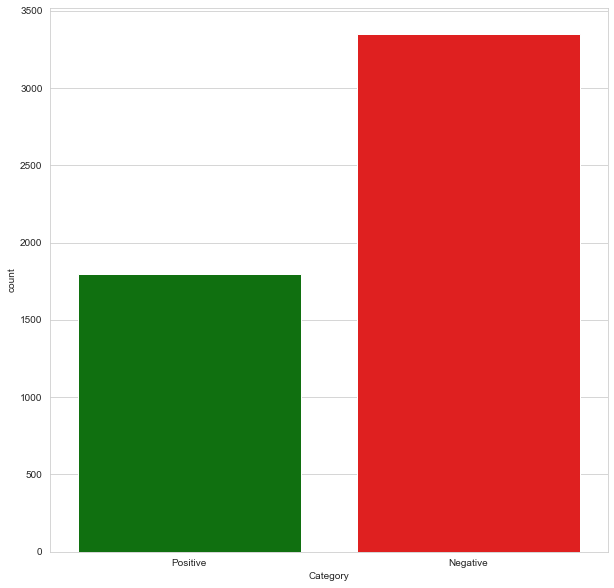

In [44]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Category", data=df_p, 
                  palette=dict(Positive="Green", Negative="Red"))

<AxesSubplot:ylabel='Category'>

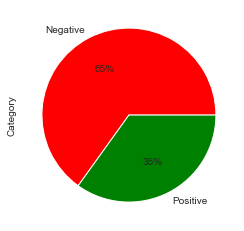

In [45]:
df_p.Category.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red","green"])

In [46]:
df_p.Category.value_counts()

Negative    3348
Positive    1796
Name: Category, dtype: int64

# Label Encoding

In [47]:
#convert Polaty_type Negative, Positive to 0, 1
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [48]:
le.fit(df_p['Category'])

LabelEncoder()

In [49]:
list(le.classes_)

['Negative', 'Positive']

In [50]:
dfn = le.transform(df_p['Category'])

In [51]:
le.inverse_transform([0,1])

array(['Negative', 'Positive'], dtype=object)

In [52]:
df_p['Category'] = dfn
df_p.info()
df_p.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Polarity      5144 non-null   float64
 1   UserComments  5138 non-null   object 
 2   Category      5144 non-null   int32  
dtypes: float64(1), int32(1), object(1)
memory usage: 100.6+ KB


Index(['Polarity', 'UserComments', 'Category'], dtype='object')

In [53]:
def clean_comment_length(UserComments):
    letters_only = re.sub("[^a-zA-Z]", " ",str(UserComments)) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words) )

In [54]:
def comment_to_words(UserComments):
    letters_only = re.sub("[^a-zA-Z]", " ",str(UserComments))
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [55]:
dflex['clean_comment']=df_p['UserComments'].apply(lambda x: comment_to_words(x))
dflex['comment_length']=df_p['UserComments'].apply(lambda x: clean_comment_length(x))
train,test = train_test_split(df_p,test_size=0.25,random_state=42)

In [56]:
train_clean_comment=[]
for comment in train['UserComments']:
    train_clean_comment.append(str(comment))
test_clean_comment=[]
for comment in test['UserComments']:
    test_clean_comment.append(str(comment))

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_comment)
test_features=v.transform(test_clean_comment)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [59]:
#Classifiers
Classifiers = [
    SVC(kernel="rbf", C=0.03, gamma = 'scale'),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    GradientBoostingClassifier(),GaussianNB()]

In [60]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

Accuracy of SVC is 0.6485225505443235
              precision    recall  f1-score   support

           0       1.00      0.65      0.79      1286
           1       0.00      0.00      0.00         0

    accuracy                           0.65      1286
   macro avg       0.50      0.32      0.39      1286
weighted avg       1.00      0.65      0.79      1286



<Figure size 432x288 with 0 Axes>

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

([<matplotlib.axis.XTick at 0x1ab204cd4c0>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x1ab204b7b80>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 432x288 with 0 Axes>

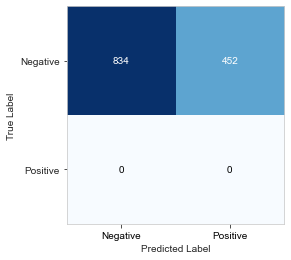

Accuracy of DecisionTreeClassifier is 0.9875583203732504
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       830
           1       0.99      0.98      0.98       456

    accuracy                           0.99      1286
   macro avg       0.99      0.99      0.99      1286
weighted avg       0.99      0.99      0.99      1286



<Figure size 432x288 with 0 Axes>

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

([<matplotlib.axis.XTick at 0x1ab20507d60>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x1ab2050dd00>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 432x288 with 0 Axes>

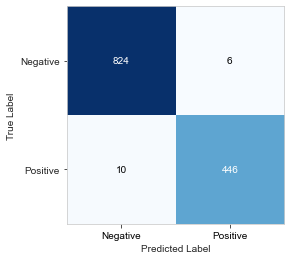

Accuracy of RandomForestClassifier is 0.9440124416796267
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       856
           1       0.90      0.94      0.92       430

    accuracy                           0.94      1286
   macro avg       0.93      0.94      0.94      1286
weighted avg       0.95      0.94      0.94      1286



<Figure size 432x288 with 0 Axes>

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

([<matplotlib.axis.XTick at 0x1ab2055a8e0>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x1ab205608e0>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 432x288 with 0 Axes>

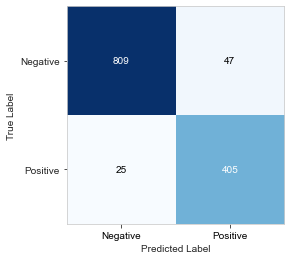

Accuracy of GradientBoostingClassifier is 0.9502332814930016
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       880
           1       0.88      0.98      0.93       406

    accuracy                           0.95      1286
   macro avg       0.93      0.96      0.94      1286
weighted avg       0.95      0.95      0.95      1286



<Figure size 432x288 with 0 Axes>

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

([<matplotlib.axis.XTick at 0x1ab205a8670>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x1ab205b0610>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 432x288 with 0 Axes>

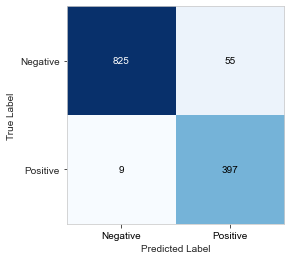

Accuracy of GaussianNB is 0.5606531881804043
              precision    recall  f1-score   support

           0       0.36      0.90      0.52       337
           1       0.92      0.44      0.60       949

    accuracy                           0.56      1286
   macro avg       0.64      0.67      0.56      1286
weighted avg       0.78      0.56      0.58      1286



<Figure size 432x288 with 0 Axes>

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

([<matplotlib.axis.XTick at 0x1ab205ecf40>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x1ab205f4f40>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 432x288 with 0 Axes>

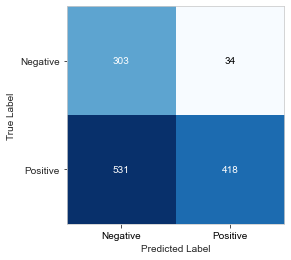

In [61]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for clf in Classifiers:
    try:
        fit = clf.fit(train_features,train['Category'])
        pred = fit.predict(test_features)
    except Exception:
        fit = clf.fit(dense_features,train['Category'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['Category'])
    Accuracy.append(accuracy)
    Model.append(clf.__class__.__name__)
    print('Accuracy of '+clf.__class__.__name__+' is '+str(accuracy)) 
    print(classification_report(pred,test['Category']))
    
    #Confusion Matrix
    cm = confusion_matrix(pred,test['Category'])
    plt.figure()
    plot_confusion_matrix(cm,cmap=plt.cm.Blues)
    plt.xticks(range(2), ['Negative','Positive'],color='black')
    plt.yticks(range(2), ['Negative','Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

<BarContainer object of 5 artists>

([<matplotlib.axis.XTick at 0x1ab205916d0>,
 [Text(0, 0, 'SVC'),
  Text(1, 0, 'DecisionTreeClassifier'),
  Text(2, 0, 'RandomForestClassifier'),
  Text(3, 0, 'GradientBoostingClassifier'),
  Text(4, 0, 'GaussianNB')])

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Model')

Text(0.5, 1.0, 'Classifier Accuracies')

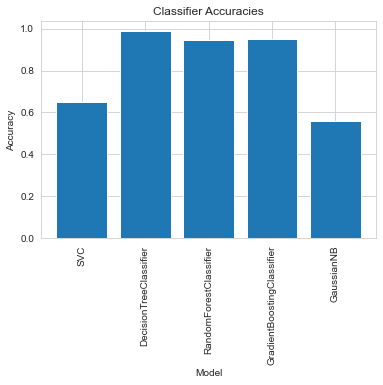

In [62]:
index=list(range(len(Classifiers)))
plt.bar(index,Accuracy)
plt.xticks(index,Model,rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Classifier Accuracies')